In [1]:
import pandas as pd

data=pd.read_csv("sqlite\外滩weibo.csv")
data

,Id,weibo_id,crawler_time,created_time,content,textLength,isLongText,source,user_id,user_screen_name,...,pic_num,pic_types,weibo_position,url_scheme,place,category,category_id,total_id,city,city_id
0,1,5045865553335461,2024-06-16 15:24:30.203265,Sun Jun 16 12:19:18 +0800 2024,魔都风云🪐上海·外滩,32,False,iPhone 13,3873929751,肚腥鱼历险记,...,9,0,0,https://m.weibo.cn/status/5045865553335461?mbl...,0,0,0,0,0,0
1,2,5045796104568982,2024-06-16 15:24:30.208251,Sun Jun 16 07:43:19 +0800 2024,爽玩上海·外滩,24,False,iPhone客户端,6298292388,鸽嗝格戈,...,9,0,0,https://m.weibo.cn/status/5045796104568982?mbl...,0,0,0,0,0,0
2,3,5045865758067433,2024-06-16 15:24:30.216067,Sun Jun 16 12:20:07 +0800 2024,微博也更新偶遇男明星嘻嘻上海·外滩,47,False,iPhone 12,6983527740,Tassgriovel_,...,2,0,0,https://m.weibo.cn/status/5045865758067433?mbl...,0,0,0,0,0,0
3,4,5045792045793485,2024-06-16 15:24:30.221281,Sun Jun 16 07:27:12 +0800 2024,王岳伦上海·外滩,26,False,iPhone客户端,7380436006,不懂什么叫霸气,...,4,0,0,https://m.weibo.cn/status/5045792045793485?mbl...,0,0,0,0,0,0
4,5,5045908148327671,2024-06-16 15:24:30.226267,Sun Jun 16 15:08:34 +0800 2024,和妈咪一起逛逛逛上海·外滩,36,False,iPhone客户端,2074449375,NuHiZeuY,...,12,0,0,https://m.weibo.cn/status/5045908148327671?mbl...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1106,5035162249467313,2024-06-16 15:38:52.767364,Fri May 17 23:28:12 +0800 2024,📍𝑆ℎ𝑎𝑛𝑔ℎ𝑎𝑖上海总要去趟上海吹吹黄浦江的晚风吧上海·外滩纠结娇的微博视频,110,False,iPhone客户端,3161037527,纠结娇,...,0,0,0,https://m.weibo.cn/status/5035162249467313?mbl...,0,0,0,0,0,0
1106,1107,5032610629421645,2024-06-16 15:38:52.803090,Fri May 10 22:28:58 +0800 2024,汪苏泷#汪苏泷十万伏特音乐计划##歌手##汪苏泷好稳#今天心情紧张又兴奋的一天哥哥勇敢冲呀打...,202,False,汪苏泷超话,6297426347,泷917,...,6,0,0,https://m.weibo.cn/status/5032610629421645?mbl...,0,0,0,0,0,0
1107,1108,5036519729661173,2024-06-16 15:38:52.840971,Tue May 21 17:22:20 +0800 2024,再一次感叹上海的交通效率，从浦东机场到陆家嘴不到没想到只过了半年就又见面啦！这次是一个人的🍃...,139,False,iPhone 15 Pro Max,6205751325,自律女人张美丽,...,10,0,0,https://m.weibo.cn/status/5036519729661173?mbl...,0,0,0,0,0,0
1108,1109,5030749784509157,2024-06-16 15:38:52.876850,Sun May 05 19:14:38 +0800 2024,赶在节假日的尾巴来看外滩的小哥哥太帅太年轻太精神啦一个个都和十六岁一样这次抖音真的没骗我嘻嘻...,333,True,iPhone 15 Pro,3024669150,Summershineling,...,6,0,0,https://m.weibo.cn/status/5030749784509157?mbl...,0,0,0,0,0,0


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\name\AppData\Local\Temp\jieba.cache
Loading model cost 0.653 seconds.
Prefix dict has been built successfully.


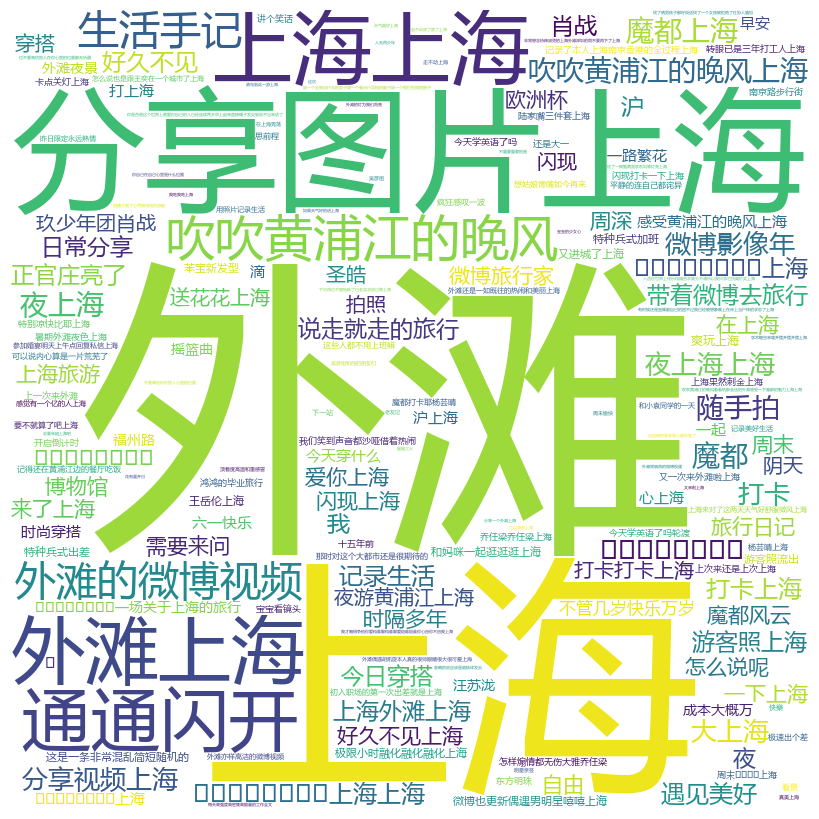

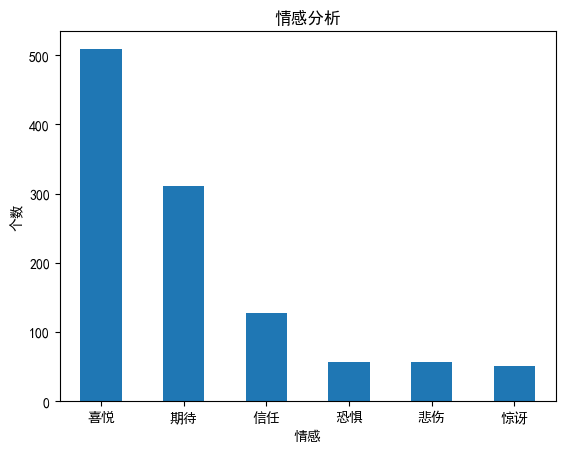

In [2]:
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from snownlp import SnowNLP
import jieba
%matplotlib inline

# 数据处理，去除除中英文外的其他字符
# data['clean_comment'] = data['comment'].apply(lambda x: re.sub(r'[^\u4e00-\u9fa5a-zA-Z ]', '', x))

# 分词
# data['word_list'] = data['clean_comment'].apply(lambda x: jieba.lcut(x))
data['word_list'] = data['content'].apply(lambda x: jieba.lcut(x))

# 生成词云
comment_words = [word for word_list in data['word_list'] for word in word_list]
# comment_words = ' '.join(data['clean_comment'])
comment_words = ' '.join(data['content'])

# 找到字体
font_path=r'c:/Windows/Fonts/msyh.ttc'
stop_words='展开c','o网页链接','查看图片'
wordcloud = WordCloud(width=800, 
                      height=800,
                      prefer_horizontal=1,
                      max_words=400,
                      stopwords=stop_words,
                      relative_scaling=0.3,
                      background_color='white',
                      font_path=font_path,
                      repeat=False,
                      collocations=False).generate(comment_words)

# 进行可视化
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# NLP情感分析
# data['sentiment'] = data['clean_comment'].apply(lambda x: SnowNLP(x).sentiments)
data['sentiment'] = data['content'].apply(lambda x: SnowNLP(x).sentiments)

# 创建情绪分类函数
def classify_sentiment(sentiment):
    if sentiment > 0.7:
        return '喜悦'
    elif sentiment > 0.5:
        return '信任'
    elif sentiment > 0.3:
        return '期待'
    elif sentiment > 0.2:
        return '惊讶'
    elif sentiment > 0.1:
        return '悲伤'
    elif sentiment > 0:
        return '恐惧'
    elif sentiment > -0.3:
        return '恶心'
    else:
        return '愤怒'

# 对情感进行分类
data['sentiment_label'] = data['sentiment'].apply(classify_sentiment)

# 统计情绪标签数量
sentiment_count = data['sentiment_label'].value_counts()

# 中文
plt.rcParams ['font.family'] ='SimHei'

# 可视化情绪分析结果
sentiment_count.plot(kind='bar')
plt.title('情感分析')
plt.xlabel('情感')
plt.ylabel('个数')
plt.xticks(rotation=0)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21aca7d7cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21aca7fb910>,
 'boxes': [<matplotlib.lines.Line2D at 0x21aca7d7850>],
 'medians': [<matplotlib.lines.Line2D at 0x21aca7fbe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21aca7ff130>],
 'means': []}

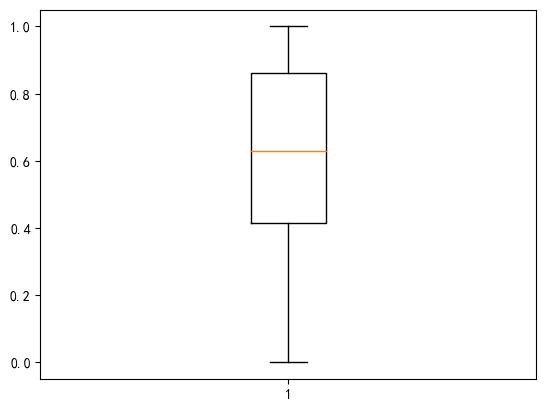

In [7]:
plt.boxplot(data['sentiment'])